In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading/Reading the data
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E6FFBE1898>]],
      dtype=object)

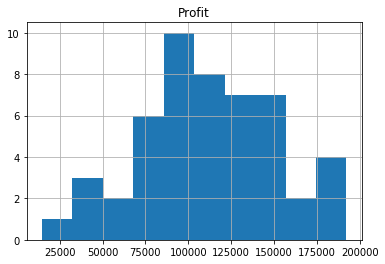

In [24]:
df.hist("Profit")

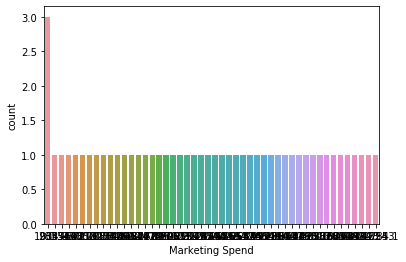

In [29]:

sns.countplot(x="Marketing Spend",data=df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [23]:
dummies=pd.get_dummies(df.State)
dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [22]:
merged = pd.concat([df,dummies],axis='columns')
merged.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [7]:
df1 = merged.drop(['State','California'],axis='columns')
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [8]:
X= df1.iloc[:,[0,1,2,4,5]]
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [9]:
Y=df1.iloc[:,3]
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [11]:
# Train and Test split
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)


In [13]:
Y_train.head()

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
Name: Profit, dtype: float64

In [14]:
# model Fitting and Training
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [15]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lm.intercept_

42554.16761773238

In [18]:
lm.coef_

array([ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02, -9.59284160e+02,
        6.99369053e+02])

In [19]:
Y_pred = lm.predict(X_test)

In [20]:
from sklearn.metrics import r2_score

In [21]:
score = r2_score(Y_test,Y_pred)
score

0.9347068473282423

In [30]:
import statsmodels.api as sm

In [31]:
import statsmodels.formula.api as smf

In [ ]:
model = sm.OLS(Y,X,df)fit
